Shape of output array:  (200, 3)
x, y, z for 50th point:  [ 1.03301783 -0.71649266 -0.21437379]
radial velocity  [[-5.31373643e-02 -1.08634558e+01 -6.46342049e-01]
 [ 8.04851089e-01 -1.08070251e+01 -7.85101683e-01]
 [ 1.64303683e+00 -1.06490385e+01 -9.14455571e-01]
 [ 2.44289638e+00 -1.03973492e+01 -1.03180811e+00]
 [ 3.18916134e+00 -1.00637944e+01 -1.13534329e+00]
 [ 3.87069503e+00 -9.66274382e+00 -1.22408246e+00]
 [ 4.48071965e+00 -9.20957271e+00 -1.29782980e+00]
 [ 5.01649373e+00 -8.71933075e+00 -1.35703870e+00]
 [ 5.47863016e+00 -8.20576556e+00 -1.40263977e+00]
 [ 5.87025878e+00 -7.68074063e+00 -1.43586708e+00]
 [ 6.19619669e+00 -7.15400086e+00 -1.45810647e+00]
 [ 6.46222780e+00 -6.63319613e+00 -1.47077764e+00]
 [ 6.67453657e+00 -6.12406754e+00 -1.47525154e+00]
 [ 6.83929943e+00 -5.63071541e+00 -1.47279884e+00]
 [ 6.96241480e+00 -5.15589105e+00 -1.46456280e+00]
 [ 7.04934306e+00 -4.70127592e+00 -1.45154957e+00]
 [ 7.10502731e+00 -4.26772905e+00 -1.43463000e+00]
 [ 7.13386990e+00 -3

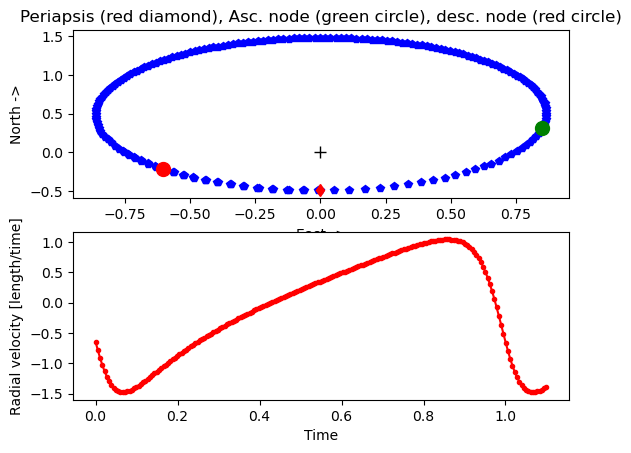

In [129]:
from __future__ import print_function, division
import numpy as np
from PyAstronomy import pyasl
import matplotlib.pylab as plt

#Part I: Orbit

# Instantiate a Keplerian elliptical orbit with
# semi-major axis of 1.0 length units,
# a period of 1.0 time units, eccentricity of 0.5,
# longitude of ascending node of 70 degrees, an inclination
# of 10 deg, and a periapsis argument of 110 deg.
ke = pyasl.KeplerEllipse(1.0, 1.0, e=0.5, Omega=70., i=10.0, w=110.0)

# Get a time axis
t = np.linspace(0, 1.1, 200)

# Calculate the orbit position at the given points
# in a Cartesian coordinate system.
pos = ke.xyzPos(t)
print("Shape of output array: ", pos.shape)

# x, y, and z coordinates for 50th time point
print("x, y, z for 50th point: ", pos[50, ::])

# Calculate orbit radius as a function of time
radius = ke.radius(t)

# Calculate velocity on orbit
vel = ke.xyzVel(t)
print("radial velocity ", vel)

# Find the nodes of the orbit (Observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

# Plot x and y coordinates of the orbit
plt.subplot(2, 1, 1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::, 1], pos[::, 0], 'bp')
# Point of periapsis
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)
# Plot RV
plt.subplot(2, 1, 2)
plt.xlabel("Time (orbital period)")
plt.ylabel("Radial velocity [length/time]")
plt.plot(t, vel[::, 2], 'r.-')
plt.show()

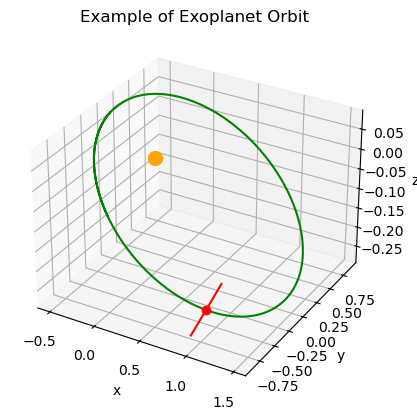

In [161]:
#create 3D plot of orbit
#remember view from Earth is from -z direction

fig = plt.figure()
ax = plt.axes(projection='3d')

pltpaxis=np.array([pos[50]-(paxis/70),pos[50]+(paxis/70)])

ax.plot3D(pos[::,0],pos[::,1], pos[::,2],'green')
ax.plot3D([0.0],[0.0],[0.0],'orange',marker='o', markersize=10)
ax.plot3D(pos[50,0],pos[50,1],pos[50,2],'red', marker='o')
ax.plot3D(pltpaxis[::,0],pltpaxis[::,1],pltpaxis[::,2],'red')

ax.set_title("Example of Exoplanet Orbit")
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
plt.show()

facing latitude (degrees):  -26.118266818302832
[ 0.24495874 -0.08915769  1.47838774]
tilt angle (degrees):  55.47626293317563
[ 1.03301783 -0.71649266 -0.21437379] [-1.03301783  0.71649266  0.21437379]
stellar angle at pos[100]:  34.892015244086565


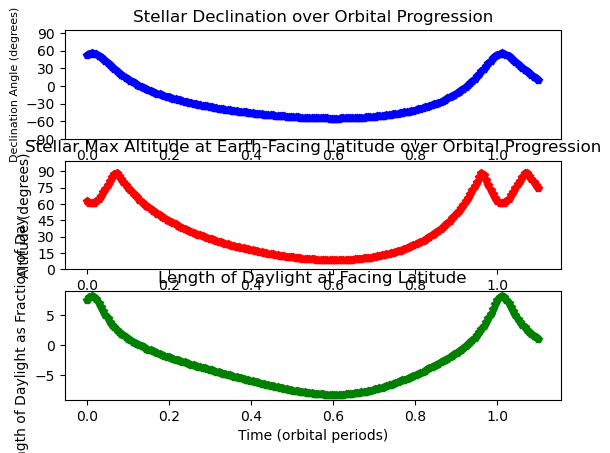

In [176]:
#Part 2: Planetary Coord System

#Define parameters of planet

#planetary radius in Earth radii
prad = 1.2

#planetary rotation speed in radii/period
prot = 1000 

#axial direction in Cartesian space of orbital system
#defining planet rotation axis
paxis = np.array([10,2,5])  #x,y,z

#calculation of planetary latitude facing us (we are in -z-direction)
facelat = -(np.pi/2)+np.arccos(paxis[2]/np.linalg.norm(paxis)) #latitude facing observer
facelatdeg = facelat*180/np.pi
print("facing latitude (degrees): ",facelatdeg)

#calculation of stellar altitude daily max
perp2orbit = np.cross(pos[50], pos[120]) #cross product of two orbital position vectors to find normal to orbital plane
tiltangle = (np.pi/2)-np.arcsin(np.dot(perp2orbit,paxis)/(np.linalg.norm(perp2orbit)*np.linalg.norm(paxis)))

i = 0
stang = np.zeros(pos.shape[0])
stalt = np.zeros(pos.shape[0])
while (i < (pos.shape[0])):
    stang[i] = (np.pi/2)-np.arccos(np.dot(-pos[i],paxis)/(np.linalg.norm(pos[i])*np.linalg.norm(paxis)))
    if((np.pi/2)-abs(facelat)+stang[i]<(np.pi/2)):
        stalt[i]=(np.pi/2)-abs(facelat)+stang[i]
    elif((np.pi/2)-abs(facelat)+stang[i]>=(np.pi/2)):
        stalt[i]=(np.pi)-((np.pi/2)-abs(facelat)+stang[i])
    i = i+1

#calculating approximate length of daylight at latitude
#atmospheric refraction effects NOT included
#calculated as fraction of full day

lod = (1/np.pi)*np.arccos(-np.tan(facelat)*np.tan(stang))

print(perp2orbit)
print("tilt angle (degrees): ", tiltangle*180/np.pi)
print(pos[50],-pos[50])
print("stellar angle at pos[100]: ", stang[10]*180/np.pi)

plt.subplot(3, 1, 1)
plt.title("Stellar Declination over Orbital Progression")
plt.xlabel("Time (orbital periods)",size=10)
plt.ylabel("Declination Angle (degrees)", size=8)
plt.ylim([-90,95])
plt.plot(t, stang*180/np.pi, 'bp')
plt.yticks(np.arange(-90,91,30))

plt.subplot(3, 1, 2)
plt.title("Stellar Max Altitude at Earth-Facing Latitude over Orbital Progression")
plt.xlabel("Time (orbital periods)")
plt.ylabel("Altitude (degrees)")
plt.ylim([0,100])
plt.plot(t, stalt*180/np.pi, 'rp')
plt.yticks(np.arange(0,91,15))

plt.subplot(3, 1, 3)
plt.title("Length of Daylight at Facing Latitude")
plt.xlabel("Time (orbital periods)") 
plt.ylabel("Length of Daylight as Fraction of Day")
#plt.ylim([0,1])
plt.plot(t, -np.tan(-80*np.pi/180)*np.tan(stang),'gp')

#maxstang = (np.pi/2)-np.arccos(np.dot(pos[0],paxis)/(np.linalg.norm(pos[0])*np.linalg.norm(paxis)))#stellar angle
#maxstangdeg = m axstang*180/np.pi
#print("max stellar angle (degrees): ", maxstangdeg)

#calculate stellar sky angle and instellation in orbital progression
#note that close-in exoplanets will deviate from standard (Sadh, 2020)





#calculate length of day in orbital progression










In [52]:
print(pos[50])
print(pos[50]+(paxis/30))
pltpaxis=np.array([pos[50],pos[50]+(paxis/30)])

[ 1.12522122 -1.03334057 -0.24875952]
[ 1.45855455 -0.9666739  -0.08209286]


In [40]:
print(pltpaxis[0,1])

-1.0333405701086449


In [41]:
print(pltpaxis[0])

[ 1.12522122 -1.03334057 -0.24875952]


In [99]:
stang.shape

(200,)

In [102]:
stang[100]

-0.9029979583102339

In [78]:
pos[]

IndexError: index 200 is out of bounds for axis 0 with size 200

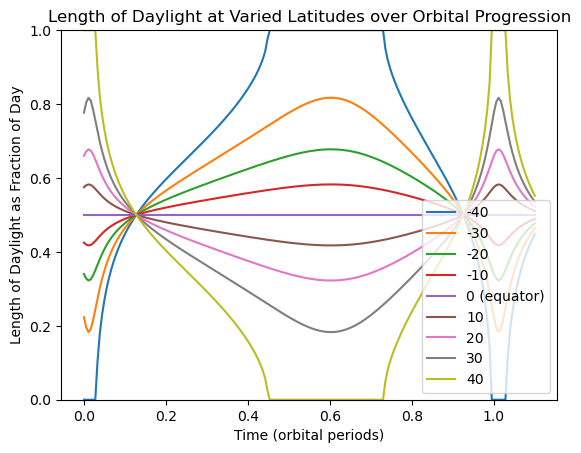

In [193]:
l = -40.0
j = 0
lodarray = np.zeros((9,pos.shape[0]))

while (l<49):
    k = 0
    while k<pos.shape[0]:
        if(abs(-np.tan(l*np.pi/180)*np.tan(stang[k]))<1.0):
           lodarray[j,k]=(1/np.pi)*np.arccos(-np.tan(l*np.pi/180)*np.tan(stang[k]))
        elif(np.tan(l*np.pi/180)*np.tan(stang[k])>=(1.0)):
           lodarray[j,k]=1.0
        elif(-np.tan(l*np.pi/180)*np.tan(stang[k])>=(1.0)):
           lodarray[j,k]=0.0
        k = k+1    
    j = j + 1
    l = l + 10.0

plt.title("Length of Daylight at Varied Latitudes over Orbital Progression")
plt.xlabel("Time (orbital periods)") 
plt.ylabel("Length of Daylight as Fraction of Day")
plt.ylim([0,1])
plt.plot(t, lodarray[0], label = '-40')
plt.plot(t, lodarray[1], label = '-30')
plt.plot(t, lodarray[2], label = '-20')
plt.plot(t, lodarray[3], label = '-10')
plt.plot(t, lodarray[4], label = '0 (equator)')
plt.plot(t, lodarray[5], label = '10')
plt.plot(t, lodarray[6], label = '20')
plt.plot(t, lodarray[7], label = '30')
plt.plot(t, lodarray[8], label = '40')
plt.legend(loc='lower right')


In [201]:
stang.max()*180/np.pi

55.47584356766409

In [202]:
paxis/np.linalg.norm(paxis)

array([0.88045091, 0.17609018, 0.44022545])